In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_payments_dataset, on="order_id", how = 'left')

In [4]:
olist_merge.describe()

,review_score,payment_sequential,payment_installments,payment_value
count,104486.000000,104485.000000,104485.000000,104485.000000
mean,4.068392,1.093372,2.856630,153.925122
std,1.361209,0.709263,2.690259,217.116119
min,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,56.780000
50%,5.000000,1.000000,1.000000,100.000000
75%,5.000000,1.000000,4.000000,171.690000
max,5.000000,29.000000,24.000000,13664.080000


In [5]:
olist_merge.corr()

,review_score,payment_sequential,payment_installments,payment_value
review_score,1.000000,-0.012863,-0.029037,-0.047644
payment_sequential,-0.012863,1.000000,-0.086792,-0.070018
payment_installments,-0.029037,-0.086792,1.000000,0.330170
payment_value,-0.047644,-0.070018,0.330170,1.000000


In [6]:
olist_merge["payment_type"] = olist_merge['payment_type'].astype('category')

<AxesSubplot:xlabel='review_score', ylabel='payment_type'>

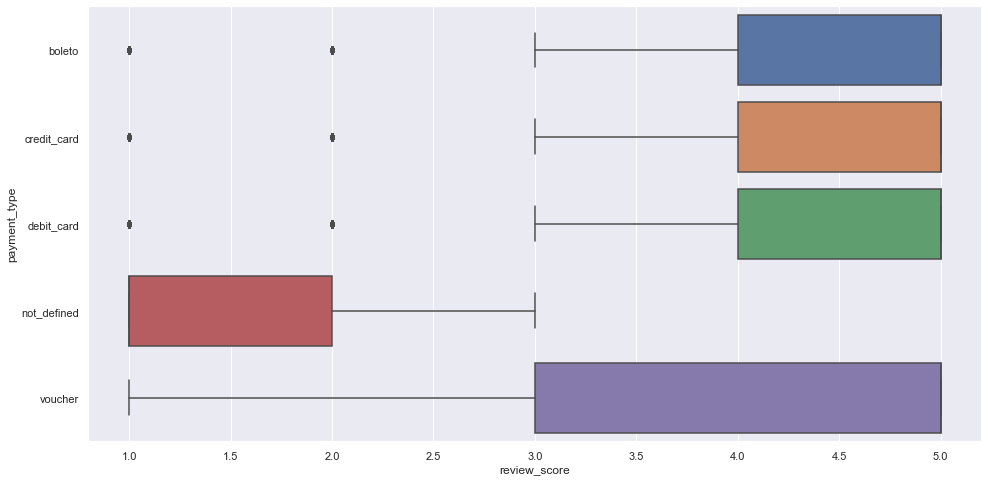

In [7]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_type', data = olist_merge)

In [8]:
olist_merge.loc[(olist_merge["payment_type"]=="not_defined")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
1181,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,9c0d840dfe562debfa52a1792bd64bff,1,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,8/28/2018 0:00,8/28/2018 18:25,1.0,not_defined,1.0,0.0
42012,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00,9efef4d70190c1bdb9b12872cc8144fc,3,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,8/17/2018 0:00,8/18/2018 15:32,1.0,not_defined,1.0,0.0
42340,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,2018-09-11 00:00:00,b54d02f7f1520b3995f84b77ab0dacb3,1,Péssima meu produtdefeito,NaN,8/24/2018 0:00,8/25/2018 2:24,1.0,not_defined,1.0,0.0


<AxesSubplot:xlabel='review_score', ylabel='payment_value'>

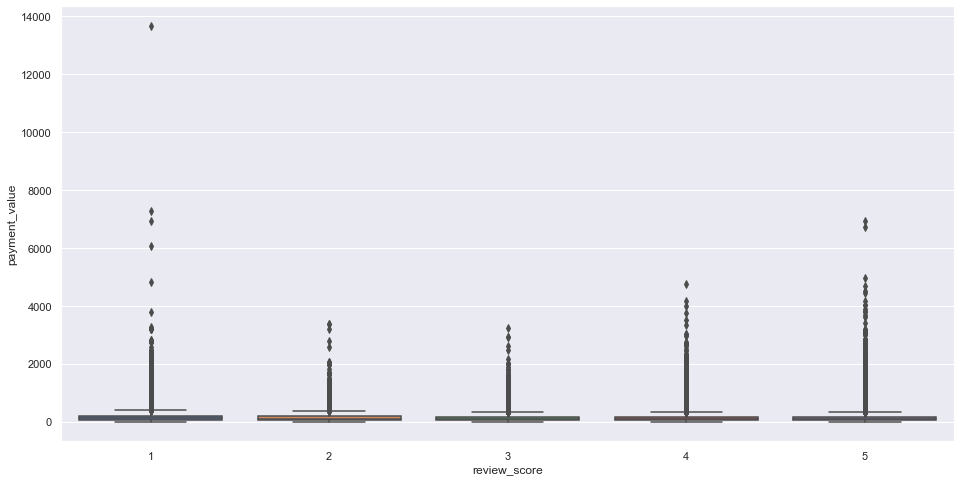

In [9]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_value', data = olist_merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_value'>

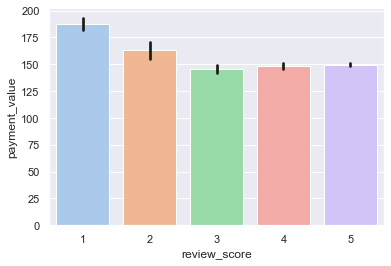

In [10]:
sb.barplot(x='review_score', y='payment_value', data=olist_merge, palette ="pastel" , errcolor='k')

This could be potentially used to predict review score and future purchases. While it may not help in predicting between 3, 4 and 5. It can be used to distinguish between 1, 2 and 3,4,5. 

<AxesSubplot:xlabel='review_score', ylabel='payment_installments'>

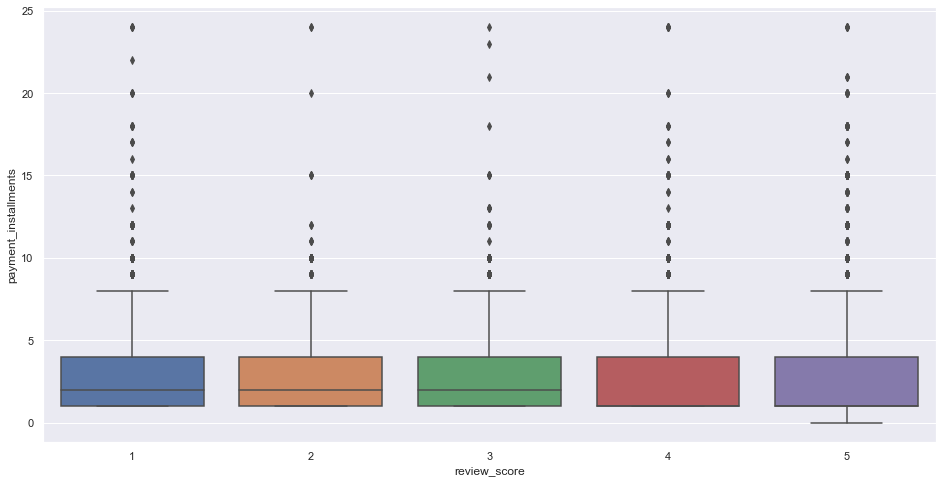

In [11]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_installments', data = olist_merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_installments'>

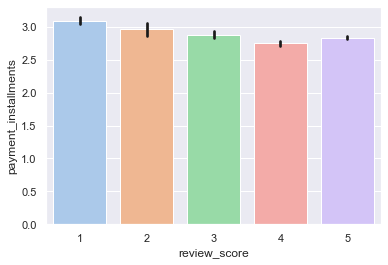

In [12]:
sb.barplot(x='review_score', y='payment_installments', data=olist_merge, palette ="pastel" , errcolor='k')

In [13]:
olist_merge = olist_merge.loc[(olist_merge["order_status"]=="delivered")]

<AxesSubplot:xlabel='review_score', ylabel='payment_type'>

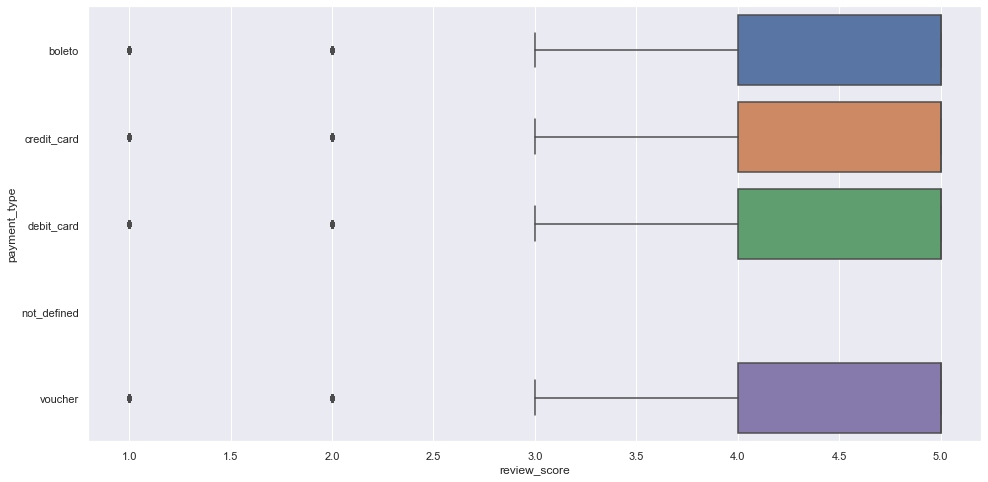

In [14]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_type', data = olist_merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_value'>

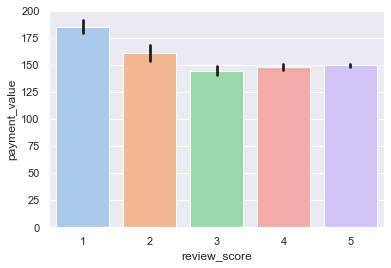

In [15]:
sb.barplot(x='review_score', y='payment_value', data=olist_merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='payment_installments'>

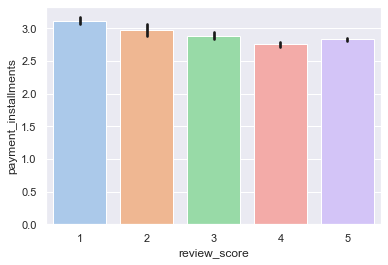

In [16]:
sb.barplot(x='review_score', y='payment_installments', data=olist_merge, palette ="pastel" , errcolor='k')